## README

The datasets `US_births_1994-2003_CDC_NCHS.csv` and `US_births_2000-2014_SSA.csv` are provided by the **Centers for Disease Control and Prevention's National Center for Health Statistics**, and the **Social Security Administration**, respectively. The raw data were compiled by FiveThirtyEight, which you can get them [here](https://github.com/fivethirtyeight/data/tree/master/births).

Below is the structure of the datasets (header: definition):

- `year`: Year
- `month`: Month
- `date_of_month`: Day number of the month
- `day_of_week`: Day of week, where 1 is Monday and 7 is Sunday
- `births`: Number of births  

In [38]:
# Create function to convert data into a list of lists
def read_csv(file_csv):
    f = open(file_csv, 'r')
    data = f.read()
    lines_list = data.split("\n")
    string_list = lines_list[1:len(lines_list)]

    final_list = []    

    for item in string_list:
     int_fields = []
     string_fields = item.split(",")
     for item2 in string_fields:
       int_fields.append(int(item2))
     final_list.append(int_fields)

    return(final_list) 

# Create new lists for cdc and ssa datasets
cdc_list = []
ssa_list = []

cdc_list = read_csv("US_births_1994-2003_CDC_NCHS.csv")
ssa_list = read_csv("US_births_2000-2014_SSA.csv")


In [40]:
# Create a general function that works for any column 
def calc_counts(data, column):
    total_counts = dict()

    for item in data:
        column_value = item[column]
        births = item[4]
        if column_value in total_counts:
            total_counts[column_value] = total_counts[column_value] + births
        else:
            total_counts[column_value] = births
     
    return(total_counts)

# Create new dictionaries
cdc_year_births = calc_counts(cdc_list, 0)
ssa_year_births = calc_counts(ssa_list, 0)

# Display cdc_year_births dictionary
print(cdc_year_births)

# Display ssa_year_births dictionary
print(ssa_year_births)

{1994: 3952767, 1995: 3899589, 1996: 3891494, 1997: 3880894, 1998: 3941553, 1999: 3959417, 2000: 4058814, 2001: 4025933, 2002: 4021726, 2003: 4089950}
{2000: 4149598, 2001: 4110963, 2002: 4099313, 2003: 4163060, 2004: 4186863, 2005: 4211941, 2006: 4335154, 2007: 4380784, 2008: 4310737, 2009: 4190991, 2010: 4055975, 2011: 4006908, 2012: 4000868, 2013: 3973337, 2014: 4010532}


In [42]:
# Combine ssa_year_births into cdc_year_births by removing overlapping years
cdc_list_combined = dict()
cdc_list_combined = cdc_year_births.copy()
cdc_list_combined.update(ssa_year_births)
    
# Display combined dictionary
cdc_list_combined

{1994: 3952767,
 1995: 3899589,
 1996: 3891494,
 1997: 3880894,
 1998: 3941553,
 1999: 3959417,
 2000: 4149598,
 2001: 4110963,
 2002: 4099313,
 2003: 4163060,
 2004: 4186863,
 2005: 4211941,
 2006: 4335154,
 2007: 4380784,
 2008: 4310737,
 2009: 4190991,
 2010: 4055975,
 2011: 4006908,
 2012: 4000868,
 2013: 3973337,
 2014: 4010532}

In [44]:
# Define a function to print out max & min value of a dicitionary
def calc_min_max(data_dict):
    key1 = max(data_dict, key=data_dict.get)
    print(data_dict[key1])
    key2 = min(data_dict, key=data_dict.get)
    print(data_dict[key2])

# Print out cdc_year_births
print(cdc_list_combined)

# Calling function
calc_min_max(cdc_list_combined)

{1994: 3952767, 1995: 3899589, 1996: 3891494, 1997: 3880894, 1998: 3941553, 1999: 3959417, 2000: 4149598, 2001: 4110963, 2002: 4099313, 2003: 4163060, 2004: 4186863, 2005: 4211941, 2006: 4335154, 2007: 4380784, 2008: 4310737, 2009: 4190991, 2010: 4055975, 2011: 4006908, 2012: 4000868, 2013: 3973337, 2014: 4010532}
4380784
3880894


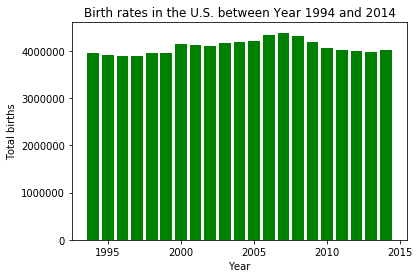

In [45]:
# Plot graphs to visualise data

import matplotlib.pyplot as plt

plt.bar(list(cdc_list_combined.keys()), cdc_list_combined.values(), color = 'g')
plt.title('Birth rates in the U.S. between Year 1994 and 2014') 
plt.xlabel('Year')
plt.ylabel('Total births')
plt.show()

## Birth rates in the United States

In this project, we explored the birth rates in the United States from Year 1994 to 2014. Within these 20 years, birth rates have been relatively stable, varying between 3.8 and 4.3 millions per year. There were small peaks from 2006 to 2008, but rates were quickly returned to the stability as before. The total number of births in 2007 - 4,380,784 births - was the highest registered in the United States within that 20 years; whereas the lowest birth rate was in 1997, standing at 3,880,894.